In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
iris=datasets.load_iris()
u=iris.target
x=iris.data[:,0]
v=np.reshape(x,(-1,1))

print(u)
print(v)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [35]:
vtrain,vtest,utrain,utest=train_test_split(v,u,test_size=.25,random_state=25)
print(vtrain,"\n")
print(vtest)
print(utrain)
print(utest)

[[5.1]
 [5. ]
 [5.4]
 [5.1]
 [4.4]
 [5. ]
 [6. ]
 [5.4]
 [5.5]
 [6. ]
 [5.2]
 [5.6]
 [7.1]
 [5. ]
 [4.8]
 [6.3]
 [5.8]
 [5.8]
 [6.7]
 [5.7]
 [6.7]
 [5.7]
 [6.2]
 [6.7]
 [5.5]
 [5.1]
 [6. ]
 [6.3]
 [6.5]
 [5.2]
 [5.2]
 [6.7]
 [4.9]
 [4.8]
 [6.7]
 [6.1]
 [6.6]
 [5.1]
 [7.6]
 [5.8]
 [5.8]
 [5.7]
 [6.5]
 [4.3]
 [4.7]
 [5.5]
 [5.1]
 [5.1]
 [6.8]
 [6.3]
 [5.7]
 [6.2]
 [6.1]
 [6.2]
 [6.4]
 [7.4]
 [6.3]
 [4.9]
 [6.3]
 [5.8]
 [5.1]
 [6.4]
 [6. ]
 [6.4]
 [6.3]
 [5.5]
 [5. ]
 [6.4]
 [4.8]
 [4.6]
 [6.1]
 [4.9]
 [5.4]
 [4.7]
 [4.4]
 [6.8]
 [7.3]
 [6.5]
 [5.8]
 [4.8]
 [5.1]
 [6.9]
 [5.8]
 [5.7]
 [5. ]
 [6.1]
 [6.7]
 [6.1]
 [4.9]
 [6.5]
 [5. ]
 [5.5]
 [7. ]
 [7.2]
 [4.6]
 [5.3]
 [4.9]
 [7.9]
 [4.8]
 [5.4]
 [6.7]
 [5.6]
 [4.6]
 [7.2]
 [5.5]
 [5.9]
 [6.3]
 [7.7]
 [5.9]
 [6.8]
 [6. ]
 [6.4]] 

[[5.2]
 [6.3]
 [5.9]
 [6. ]
 [6.4]
 [6.7]
 [6.1]
 [4.4]
 [5.5]
 [5. ]
 [5.1]
 [5.4]
 [5. ]
 [6.3]
 [4.6]
 [6.6]
 [7.2]
 [6.9]
 [5.6]
 [5.6]
 [5.7]
 [5.7]
 [5.6]
 [5.4]
 [4.9]
 [7.7]
 [5.6]
 [7.7]
 [6.9]
 [4.5]
 [6

In [50]:
Lr=LinearRegression()
Lr.fit(vtrain,utrain)
u_predict=Lr.predict(vtest)
print("--------Test Class--------\n",utest)
print("--------Predict Class--------\n",u_predict)
print(r2_score(utest,u_predict))
print(Lr.coef_)
print(Lr.intercept_)


--------Test Class--------
 [0 1 1 1 2 1 2 0 1 1 0 0 0 2 0 1 2 2 1 1 1 1 1 0 0 2 1 2 2 0 1 2 2 0 2 1 1
 0]
--------Predict Class--------
 [ 0.50145563  1.38903751  1.06628047  1.14696973  1.46972677  1.71179456
  1.22765899 -0.14405846  0.74352342  0.34007711  0.42076637  0.66283416
  0.34007711  1.38903751  0.01732006  1.6311053   2.11524087  1.87317308
  0.82421268  0.82421268  0.90490194  0.90490194  0.82421268  0.66283416
  0.25938785  2.51868718  0.82421268  2.51868718  1.87317308 -0.0633692
  1.55041604  0.90490194  2.51868718  0.34007711  1.46972677  1.87317308
  1.30834825  0.34007711]
0.6265363719646146
[0.80689262]
-3.694385978716287


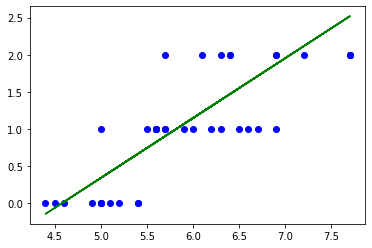

In [49]:
plt.scatter(vtest,utest, c='blue', marker='o')
plt.plot(vtest,u_predict,color='green' )
plt.show()